# Used Car Price Prediction Project 

In [129]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
import pickle

In [130]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [131]:
df=pd.read_csv('usedCars.csv')
df.head()

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


## Data Cleaning

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1064 non-null   int64  
 1   Company           1064 non-null   object 
 2   Model             1064 non-null   object 
 3   Variant           1064 non-null   object 
 4   FuelType          1063 non-null   object 
 5   Colour            1064 non-null   object 
 6   Kilometer         1064 non-null   int64  
 7   BodyStyle         1064 non-null   object 
 8   TransmissionType  350 non-null    object 
 9   ManufactureDate   1064 non-null   object 
 10  ModelYear         1064 non-null   int64  
 11  CngKit            22 non-null     object 
 12  Price             1064 non-null   object 
 13  Owner             1064 non-null   object 
 14  DealerState       1064 non-null   object 
 15  DealerName        1064 non-null   object 
 16  City              1064 non-null   object 


In [133]:
df['Price'].sort_values()

992       1 Lakhs
953    1.19 Lakhs
976     1.2 Lakhs
917     1.4 Lakhs
508    1.45 Lakhs
          ...    
179    9.91 Lakhs
749    9.92 Lakhs
724    9.97 Lakhs
5      9.99 Lakhs
291        95,000
Name: Price, Length: 1064, dtype: object

**Type Casting Price column to Float**

In [134]:
def convert_amnt(amt):
    if 'Lakhs' in amt:
        # 1 Lakhs=100000 thats why conversion is done 
        return float(amt.replace(' Lakhs','').replace(',',''))*100000
    else:
        # there is some entries which contain comma( , )
        return float(amt.replace(',',''))
df['Price']=df['Price'].apply(convert_amnt)

In [135]:
df.describe(include='all')

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
count,1064.000000,1064,1064,1064,1063,1064,1064.000000,1064,350,1064,1064.000000,22,1.064000e+03,1064,1064,1064,1064,1064.000000,1064.000000
unique,NaN,23,218,575,5,76,NaN,10,9,162,NaN,2,NaN,4,10,57,11,NaN,NaN
top,NaN,MARUTI SUZUKI,SWIFT,VXI,PETROL,White,NaN,HATCHBACK,Manual,2018-01-01,NaN,Company Fitted,NaN,1st Owner,Delhi,Car Choice Exclusif,Delhi,NaN,NaN
freq,NaN,252,38,37,670,289,NaN,423,269,25,NaN,14,NaN,897,196,67,196,NaN,NaN
mean,568156.542293,NaN,NaN,NaN,NaN,NaN,52807.187970,NaN,NaN,NaN,2016.864662,NaN,8.350536e+05,NaN,NaN,NaN,NaN,0.738722,7.770207
std,16438.139974,NaN,NaN,NaN,NaN,NaN,33840.296979,NaN,NaN,NaN,2.996786,NaN,5.726538e+05,NaN,NaN,NaN,NaN,0.439538,0.719717
min,525978.000000,NaN,NaN,NaN,NaN,NaN,101.000000,NaN,NaN,NaN,2003.000000,NaN,9.500000e+04,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,555321.500000,NaN,NaN,NaN,NaN,NaN,32113.500000,NaN,NaN,NaN,2015.000000,NaN,4.850000e+05,NaN,NaN,NaN,NaN,0.000000,7.500000
50%,572753.000000,NaN,NaN,NaN,NaN,NaN,49432.000000,NaN,NaN,NaN,2017.000000,NaN,6.750000e+05,NaN,NaN,NaN,NaN,1.000000,7.800000
75%,583072.750000,NaN,NaN,NaN,NaN,NaN,68828.500000,NaN,NaN,NaN,2019.000000,NaN,9.850000e+05,NaN,NaN,NaN,NaN,1.000000,8.100000


In [136]:
#Null values percentage wise
df.isnull().sum()/len(df)*100

Id                   0.000000
Company              0.000000
Model                0.000000
Variant              0.000000
FuelType             0.093985
Colour               0.000000
Kilometer            0.000000
BodyStyle            0.000000
TransmissionType    67.105263
ManufactureDate      0.000000
ModelYear            0.000000
CngKit              97.932331
Price                0.000000
Owner                0.000000
DealerState          0.000000
DealerName           0.000000
City                 0.000000
Warranty             0.000000
QualityScore         0.000000
dtype: float64

**In this dataset - three columns have missing values -FuelType,TransmissionType and CngKit**
* Will remove the CngKit column because CNG cars can be identified from the FuelType column
* In TransmissionType, 67% data is missing lets drop this column
* And in FuelType will drop the rows with null values

In [137]:
df.drop('CngKit',axis=1,inplace=True)
df.drop('TransmissionType',axis=1,inplace=True)
#Removing null values from FuelType column
df['FuelType'].dropna(inplace=True)

In [138]:
df['Variant'].nunique()

575

**The number of unique variants is very high and would create too many categories (resulting in overfitting or sparsity), it might be better to drop it**

In [139]:
df.drop('Variant',axis=1,inplace=True)
#Variants can influence the price due to differences in features, trims, and specifications. 
#However, this information might already be captured in other features like FuelType, Warranty, or QualityScore

In [140]:
#dropping column ID, as it is a identifier and not required for analysis
df.drop('Id',axis=1,inplace=True)

In [141]:
df[['ManufactureDate','ModelYear']]

,ManufactureDate,ModelYear
0,2018-02-01,2018
1,2021-03-01,2021
2,2015-03-01,2015
3,2020-08-01,2020
4,2010-11-01,2010
...,...,...
1059,2020-09-01,2020
1060,2019-01-01,2019
1061,2013-05-01,2013
1062,2018-06-01,2018


**Dropping ManufactureDate column as it the age of the car and we already have the ModelYear column**

In [142]:
df.drop('ManufactureDate',axis=1,inplace=True)

**Changing the model year column to car age column**

In [143]:
df['ModelYear'] = 2025 - df['ModelYear']
df.rename(columns={'ModelYear':'Age'},inplace=True)

In [144]:
df['BodyStyle'].unique()

array(['HATCHBACK', 'SEDAN', 'MPV', 'SUV', 'HATCHBACK ', 'VAN', 'MUV',
       'COMPACTSUV', 'Sedan', 'SUV '], dtype=object)

In [145]:
df['BodyStyle']=df['BodyStyle'].str.strip().str.upper()
df['BodyStyle'].unique()

array(['HATCHBACK', 'SEDAN', 'MPV', 'SUV', 'VAN', 'MUV', 'COMPACTSUV'],
      dtype=object)

In [146]:
df.head()

,Company,Model,FuelType,Colour,Kilometer,BodyStyle,Age,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,MARUTI SUZUKI,CELERIO(2017-2019),PETROL,Silver,33197,HATCHBACK,7,575000.0,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,MARUTI SUZUKI,ALTO,PETROL,Red,10322,HATCHBACK,4,435000.0,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,HYUNDAI,GRAND I10,PETROL,Grey,37889,HATCHBACK,10,470000.0,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,TATA,NEXON,PETROL,A Blue,13106,HATCHBACK,5,990000.0,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,FORD,FIGO,DIESEL,Silver,104614,HATCHBACK,15,270000.0,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


## Visualisation(EDA)

### Car Company

Text(0.5, 1.0, 'Number of cars by company')

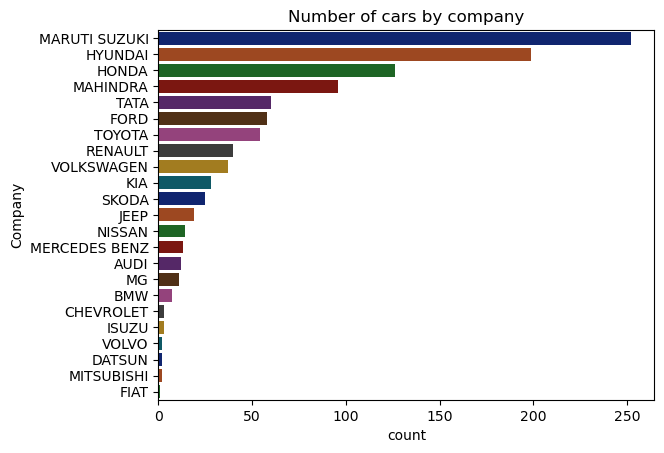

In [147]:
sns.countplot(data=df['Company'],order=df['Company'].value_counts().index,palette='dark').set_title('Number of cars by company')

There are total 23 companies in the dataset, out which Maruti Suzuki, Hyundai, Honda, Mahindra and Tata are the top five companies who used cars are for sale. Therefore, we can assume 
* That these company's car are more durable and have a good resale value.
* These brands likely offer cars at prices that appeal to more people, making them popular in the resale market.


### Top 10 Car Models

Text(0.5, 1.0, 'Top 10 Car Models')

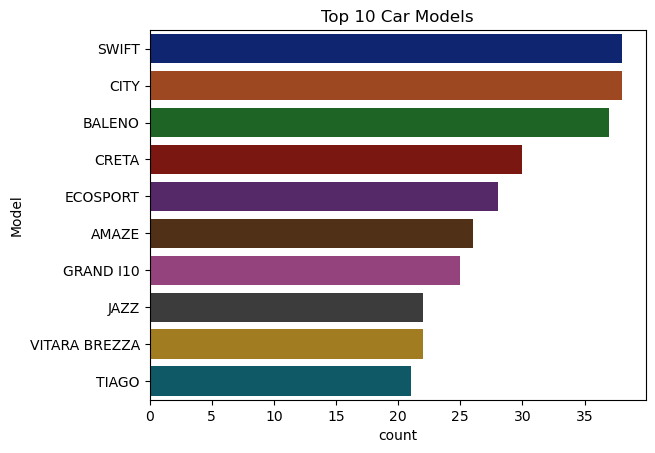

In [148]:
sns.countplot(data=df['Model'],order=df['Model'].value_counts().iloc[:10].index,palette='dark').set_title('Top 10 Car Models')

Honda City and Swift are the top two car models in the dataset, followed by Baleno, Creata and EcoSport. Therefore, we can assume 
* That these car models are more durable and have a good resale value.
* Graph also shows that Honda City and Swift are more in demand in the used car market.

### Car Fuel Type

Text(0.5, 1.0, 'Number of cars by Fuel Type')

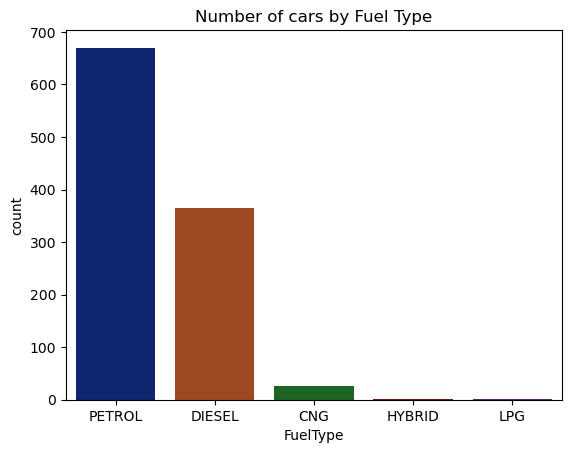

In [149]:
sns.countplot(x = 'FuelType', data = df, palette = 'dark').set_title('Number of cars by Fuel Type')

### Odometre Reading

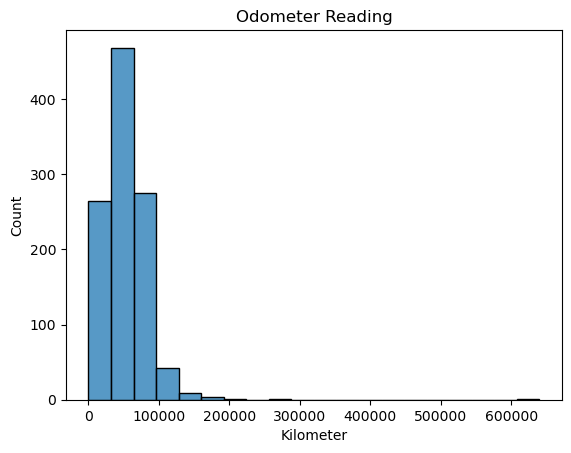

In [150]:
#Odometer reading distribution
sns.histplot(x = 'Kilometer', data = df, bins = 20).set_title('Odometer Reading')
plt.show()

This graph shows the distribution of car odometer readings in the dataset.
* Most cars have readings below 100,000 km, with the majority between 30,000 and 50,000 km. This suggests that cars with lower odometer readings are more in demand and have better resale value in the used car market.

### Price Distribution

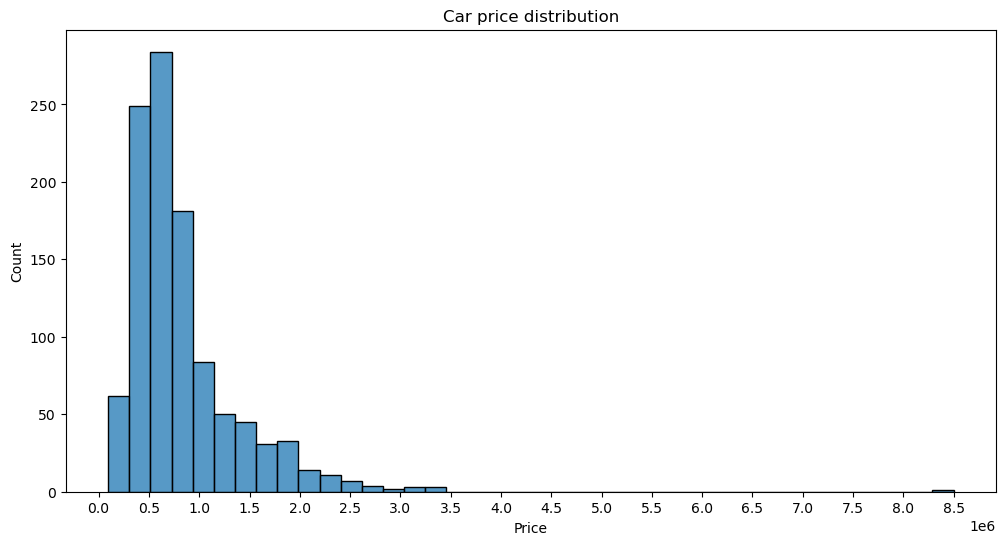

In [151]:
plt.figure(figsize=(12, 6))
sns.histplot(x = 'Price', data =df, bins = 40).set_title('Car price distribution')
max_price = int(df['Price'].max())
plt.xticks(ticks=range(0, max_price + 1, 500000))
plt.show()

* Most of the cars have price is between 3 to 9 lakhs, with maximum cars between 3 to 6 lakhs.
* We can assume that cars with price between 3 to 9 lakhs are more in demand in the used car market.
* Some cars with resale price more than 20 lakhs, which could be possible for luxury cars or it could be an outlier

### Car Owner Type

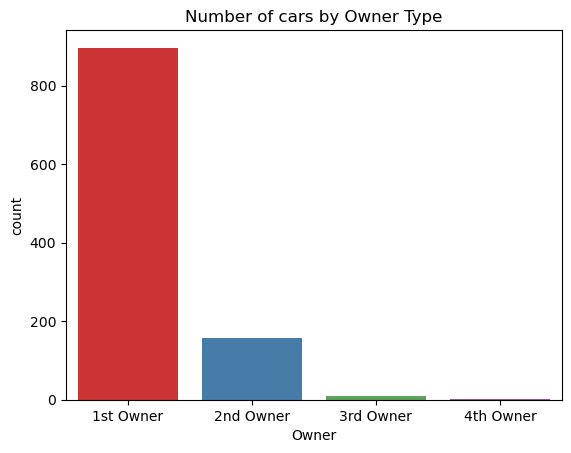

In [152]:
sns.countplot(x = 'Owner', data = df,palette='Set1').set_title('Number of cars by Owner Type')
plt.show()

* Majority of the cars that are been sold are 1st Owner cars followed by 2nd Owner cars which are significantly less in number as compared to 1st Owner.
* Therefore, we can assume that 1st Owner cars are more preferred in the used car market and have a good resale value.

### Quality Score Distribution

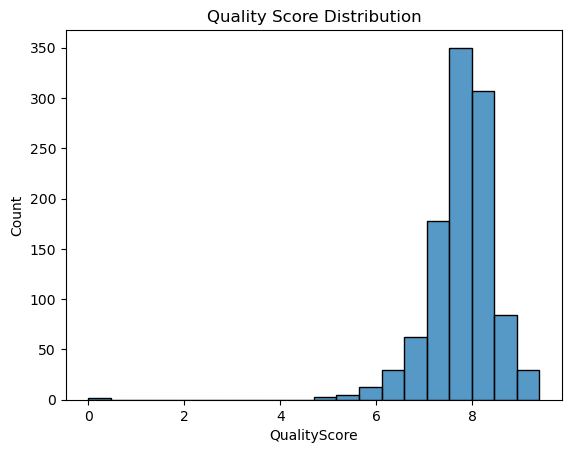

In [153]:
sns.histplot(x='QualityScore',data=df,bins=20).set_title('Quality Score Distribution')
plt.show()

* Quality score is an important feature which has a huge impact on the car sales and its preference by the customers
* Cars with higher quality scores tend to have a much higher resale value and are more preferred by the customers.
* Most of the cars have a decent quality score between 7-8, which highlights that the cars are thoroughly checked before being sold in the used car market.
* There are some cars with quality score less than 5, which could be due to the fact that they are not in good condition or they are very old.

**Now looking for relationship between the Car Price and the Independent variables**

### Top 10 Car Companies by Price

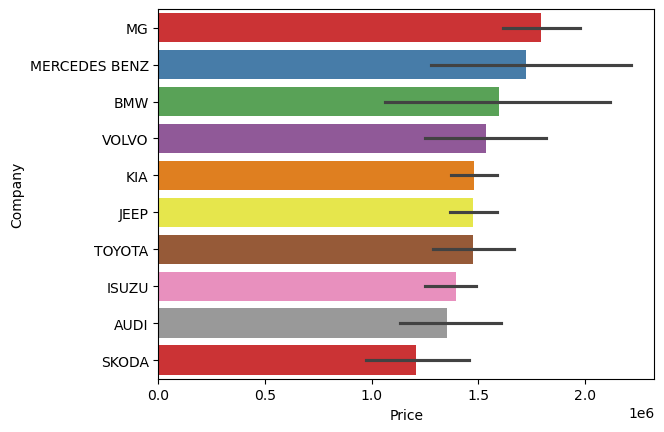

In [154]:
sns.barplot(y='Company',x='Price',data=df,order=df.groupby('Company')['Price'].mean().sort_values(ascending=False).iloc[:10].index , palette='Set1')
plt.show()

This graph shows the top 10 car companies in the dataset with the highest resale value. 
* The MG, Mercedes Benz and BMW are the top 3 car companies with the highest resale value, since these are luxury car companies.
* Surprisingly Audi has much lower resale price has compared to the other luxury car companies which might be due to other features.
* My previous hypothesis, concerning the car companies -Maruti Suzuki, Hyundai, Honda, Mahindra and Tata, was wrong because they are not in the list of top 10. That means that their cars are more in number due to their demand because of a low price.

### Car Fuel Type and Price

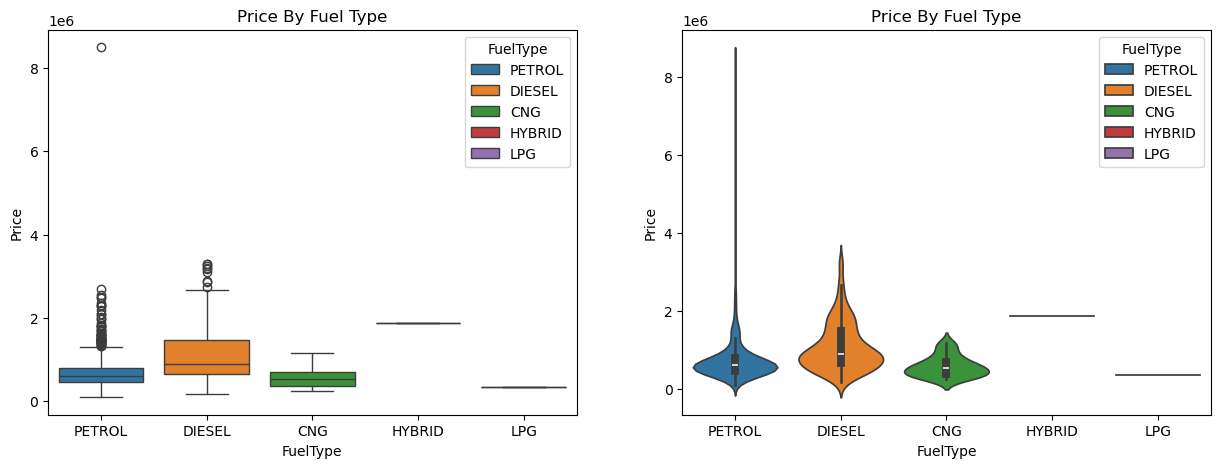

In [155]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='FuelType',y='Price',data=df,ax=ax[0],hue='FuelType').set_title('Price By Fuel Type')
sns.violinplot(x='FuelType',y='Price',data=df,ax=ax[1],hue='FuelType').set_title('Price By Fuel Type')
plt.show()


* The boxplot shows that diesel cars have higher resale value compared to petrol, CNG, and LPG cars.
* The violin plot reveals that diesel car prices are mostly between 10 to 20 lakhs. This suggests that customers prefer petrol and diesel cars, with diesel cars being more in demand in the used car market

### Odometer Reading and Price

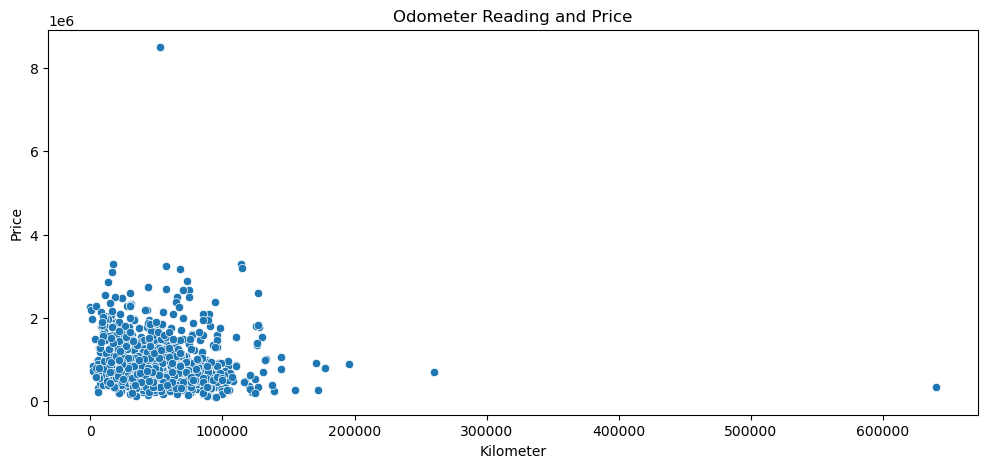

In [156]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='Kilometer',y='Price',data=df).set_title('Odometer Reading and Price')
plt.show()

* The scatter plot shows most cars have odometer readings below 100,000 km, concentrated near the origin.
* Cars with lower odometer readings have higher resale values, while higher readings decrease resale value. 

### Body Style And Price

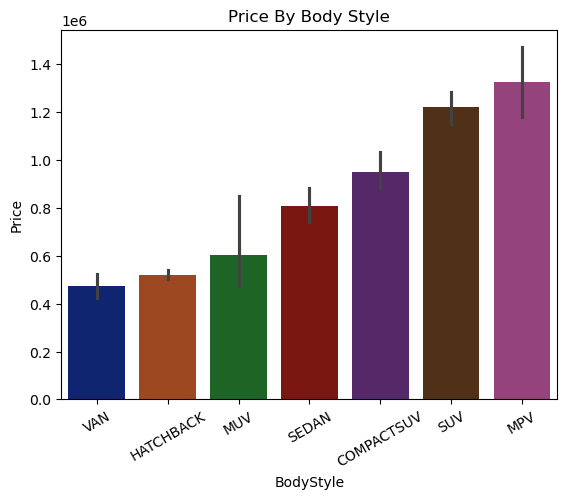

In [157]:
sns.barplot(x='BodyStyle',y='Price',data=df,order=df.groupby('BodyStyle')['Price'].mean().sort_values().index,palette='dark').set_title('Price By Body Style')
plt.xticks(rotation=30)
plt.show()

* MPV, SUV and COMPACTSUV are the top 3 car body styles with the highest resale value. Therefore, we can assume that these body styles are more preferred in the used car market and have a good resale value.

### Car Age and Price

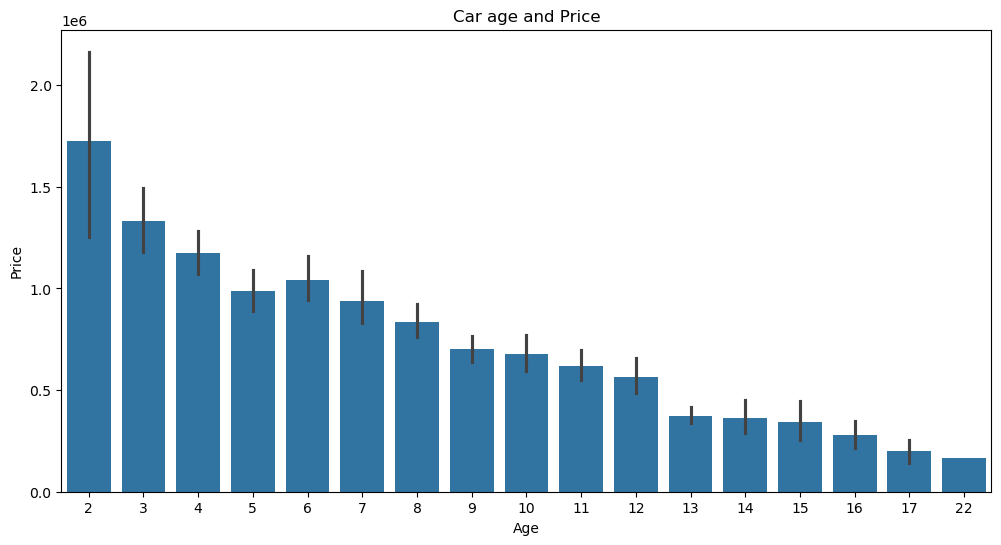

In [158]:
plt.figure(figsize=(12, 6))
sns.barplot(x = 'Age', y = 'Price', data = df).set_title('Car age and Price')
plt.show()

* Age is a key factor in car resale value. This graph shows that newer cars (less than a year old) have the highest prices, and prices decrease as cars get older.
* Cars with age less than 5 years old generally have better resale value

### Location based Price Distribution

C:\Users\HP\AppData\Local\Temp\ipykernel_16732\3863052765.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
C:\Users\HP\AppData\Local\Temp\ipykernel_16732\3863052765.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
C:\Users\HP\AppData\Local\Temp\ipykernel_16732\3863052765.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)


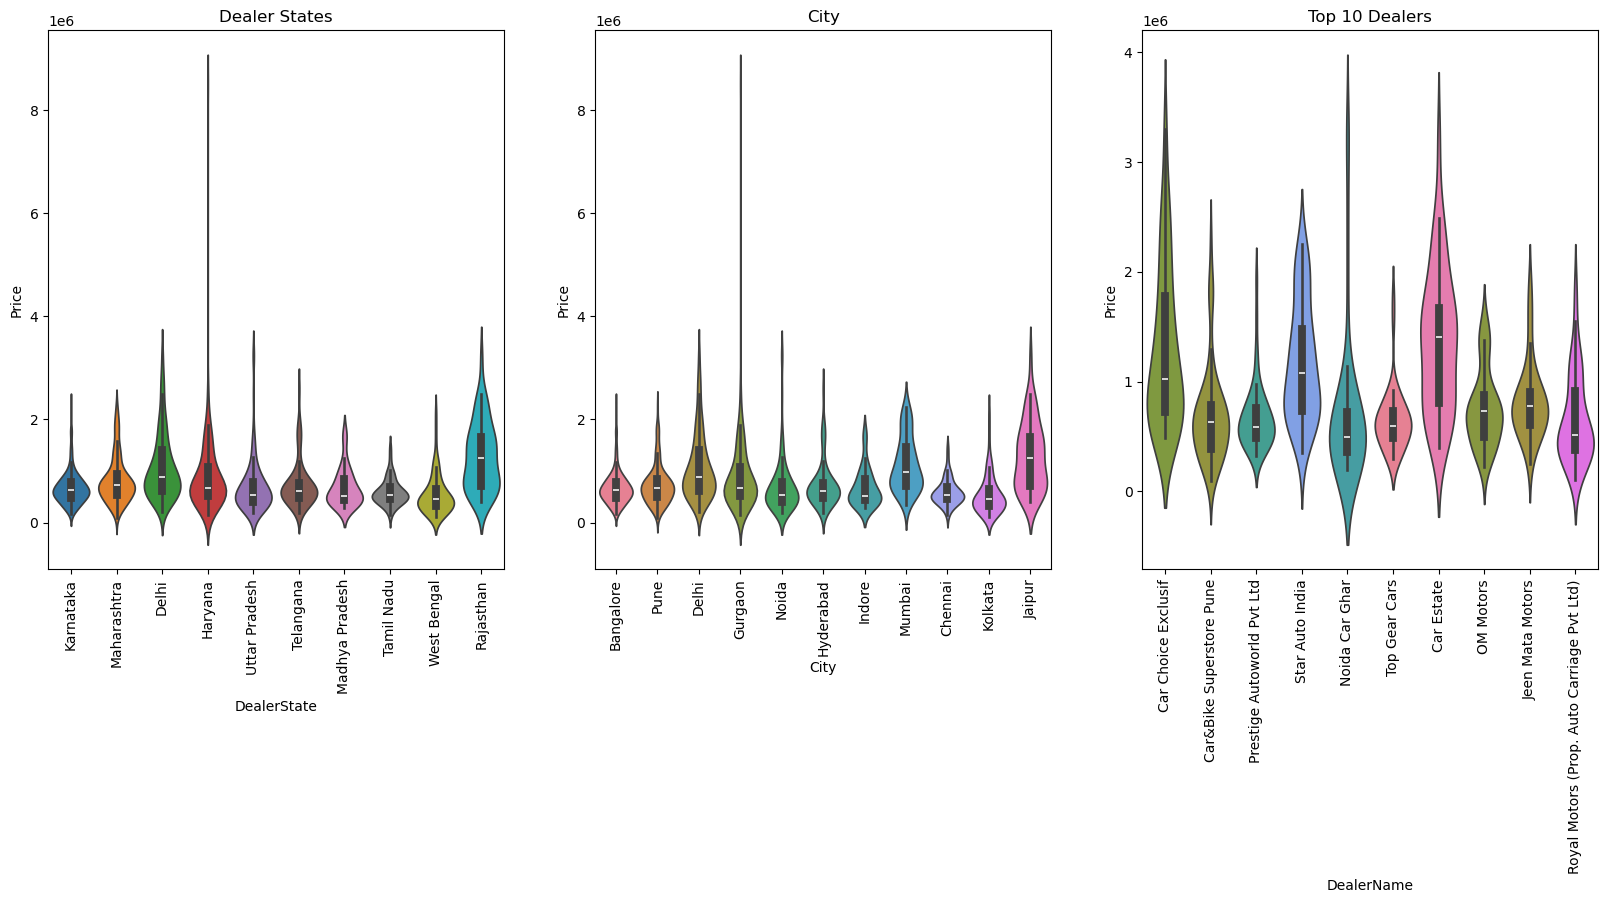

In [159]:
fig, ax = plt.subplots(1,3,figsize=(20,7))

#Dealer State
sns.violinplot(x = 'DealerState', y = 'Price', data = df, ax = ax[0], hue = 'DealerState').set_title('Dealer States')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

#City
sns.violinplot(x = 'City',y = 'Price', data = df, ax = ax[1], hue = 'City').set_title('City')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)

#top 10 dealers
sns.violinplot(x = 'DealerName',y = 'Price', data = df, order = df['DealerName'].value_counts().iloc[:10].index, ax = ax[2], hue = 'DealerName').set_title('Top 10 Dealers')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)
plt.show()


* The graphs show the price distribution based on state, city, and dealer name.
  * State: Cars in Rajasthan have the highest prices, followed by Delhi. Outliers are visible, with a strong peak in Haryana.
  * City: Jaipur leads in car prices, followed by Mumbai and Delhi. Gurgaon shows a strong peak indicating outliers.
  * Dealer Name: Among the top 10 dealers, Car Estate has the highest prices, followed by Star Auto India and Car Choice. A strong peak is visible for Noida Car Ghar, indicating outliers.

### Car Owner Type and Price

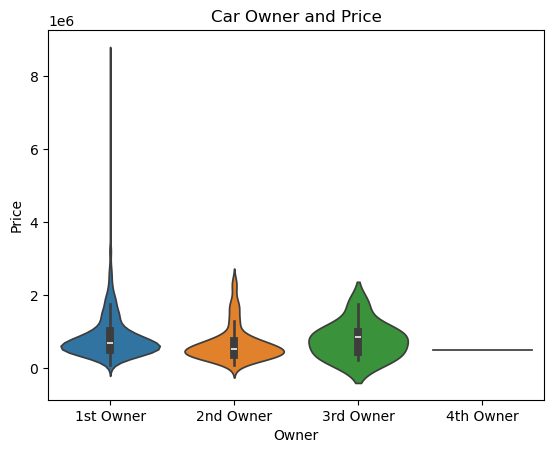

In [160]:
sns.violinplot(x='Owner',y='Price',data=df,hue='Owner').set_title('Car Owner and Price')
plt.show()

* Cars with the 1st owner have the highest prices, as they are newer.
* Surprisingly, 3rd owner cars, though fewer in number, have higher prices than 2nd owner cars.
* This could indicate that 3rd owner cars are luxury or vintage vehicles.

## Data Transformation

In [161]:
#Using IQRS to remove outliers

#columns for outlier removal
cols = df.select_dtypes(include=['int64','float64']).columns
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)

IQR = Q3 - Q1

#Removing outliers
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [162]:
df['Model'].nunique()

178

In [163]:
df.drop(['City','DealerName','Warranty'],axis=1,inplace=True)

In [164]:
#slecting categorical columns
cols=df.select_dtypes(include=['object']).columns
#Exclude Model for Target Encoding
cols=cols.drop('Model')

# Create a dictionary to store label encoders
label_encoders = {}
#labelencoding object 
le=LabelEncoder()
# Label encoding for object-type columns (excluding 'Model')
for i in cols:
    df[i]=le.fit_transform(df[i])
    label_encoders[i] = le

# Save the label encoders to a pickle file
pickle.dump(label_encoders, open("label_encoders.pkl", 'wb'))

In [165]:
print(label_encoders.keys())


dict_keys(['Company', 'FuelType', 'Colour', 'BodyStyle', 'Owner', 'DealerState'])


In [166]:
# Calculate mean price for each model
mean=df.groupby('Model')['Price'].mean()
model_target_mean =mean.to_dict()

# Map mean price to 'Model'
df['Model_encoded']=df['Model'].map(mean)

# Dropping original 'Model' column if no longer needed
df.drop('Model', axis=1, inplace=True)

# Save the target encoding map using pickle
pickle.dump(model_target_mean, open("model_target_mean.pkl", 'wb'))

In [167]:
df.head()

,Company,FuelType,Colour,Kilometer,BodyStyle,Age,Price,Owner,DealerState,QualityScore,Model_encoded
0,12,3,52,33197,1,7,575000.0,0,2,7.8,528666.666667
1,12,3,49,10322,1,4,435000.0,0,2,8.3,330000.000000
2,7,3,27,37889,1,10,470000.0,0,2,7.9,502480.000000
3,19,3,0,13106,1,5,990000.0,0,2,8.1,831076.923077
4,5,1,52,104614,1,15,270000.0,1,2,7.5,367000.000000


<Axes: >

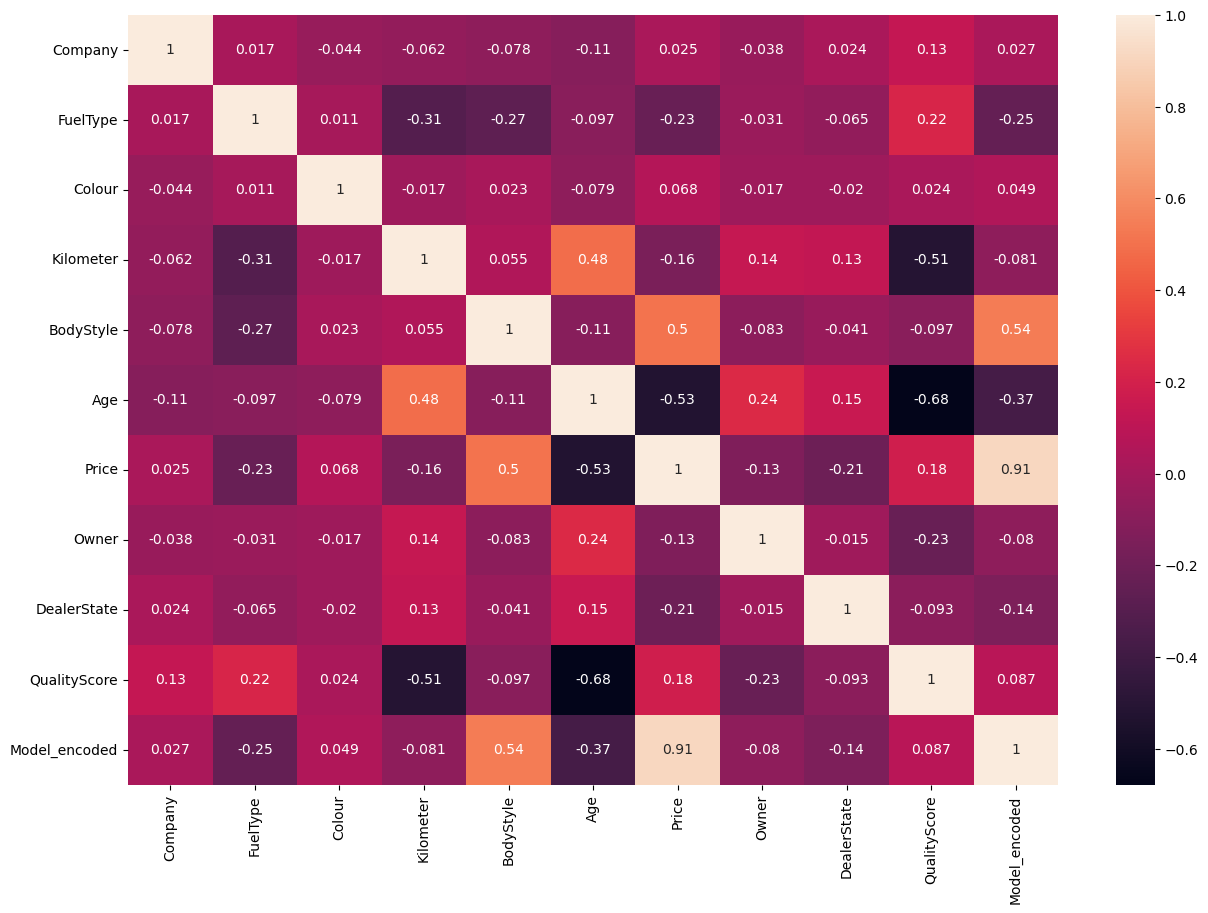

In [168]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

## Model Building, Tuning And Evaluation

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price',axis=1), df['Price'], test_size=0.2, random_state=42)

In [170]:
from sklearn.tree import DecisionTreeRegressor
#Decision Tree Regressor Object
dtr = DecisionTreeRegressor()

In [171]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    'max_depth' : [2,4,6,8],
    'min_samples_leaf' : [2,4,6,8],
    'min_samples_split' : [2,4,6,8],
    'random_state' : [0,42]
}

#Grid Search Object
grid = GridSearchCV(estimator=dtr, param_grid=para, cv=5, n_jobs=-1, verbose=2)

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 0}


In [172]:
#decision tree regressor with best parameters
dtr = DecisionTreeRegressor(max_depth=6, min_samples_leaf=2, min_samples_split=8, random_state=0)

#Fitting the model
dtr.fit(X_train, y_train)

#Training score
print(dtr.score(X_train, y_train))

0.9241006403495892


In [173]:
#Prediction
dtr_pred = dtr.predict(X_test)

In [174]:
from sklearn.ensemble import RandomForestRegressor
#Random Forest Regressor Object
rfr = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    'max_depth' : [2,4,6,8],
    'min_samples_leaf' : [2,4,6,8],
    'min_samples_split' : [2,4,6,8],
    'random_state' : [0,42]
}

#Grid Search Object
grid = GridSearchCV(estimator=rfr, param_grid=para, cv=5, n_jobs=-1, verbose=2)

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


In [86]:
#Random Forest Regressor with best parameters
rfr = RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=42)

#Fitting the model
rfr.fit(X_train, y_train)

#Training score
print(rfr.score(X_train, y_train))

0.9575637961853184


In [87]:
#Prediction
rfr_pred = rfr.predict(X_test)

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Decision Tree Regressor
print('Decision Tree Regressor')
print('Mean Squared Error : ', mean_squared_error(y_test, dtr_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, dtr_pred))
print('R2 Score : ', r2_score(y_test, dtr_pred))

#Random Forest Regressor
print('Random Forest Regressor')
print('Mean Squared Error : ', mean_squared_error(y_test, rfr_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, rfr_pred))
print('R2 Score : ', r2_score(y_test, rfr_pred))

Decision Tree Regressor
Mean Squared Error :  18051634799.038986
Mean Absolute Error :  98491.13040689987
R2 Score :  0.832433125612718
Random Forest Regressor
Mean Squared Error :  13091162826.904602
Mean Absolute Error :  83678.28604960206
R2 Score :  0.878479414112889


### Feature Importance

Text(0.5, 1.0, 'Random Forest Regressor')

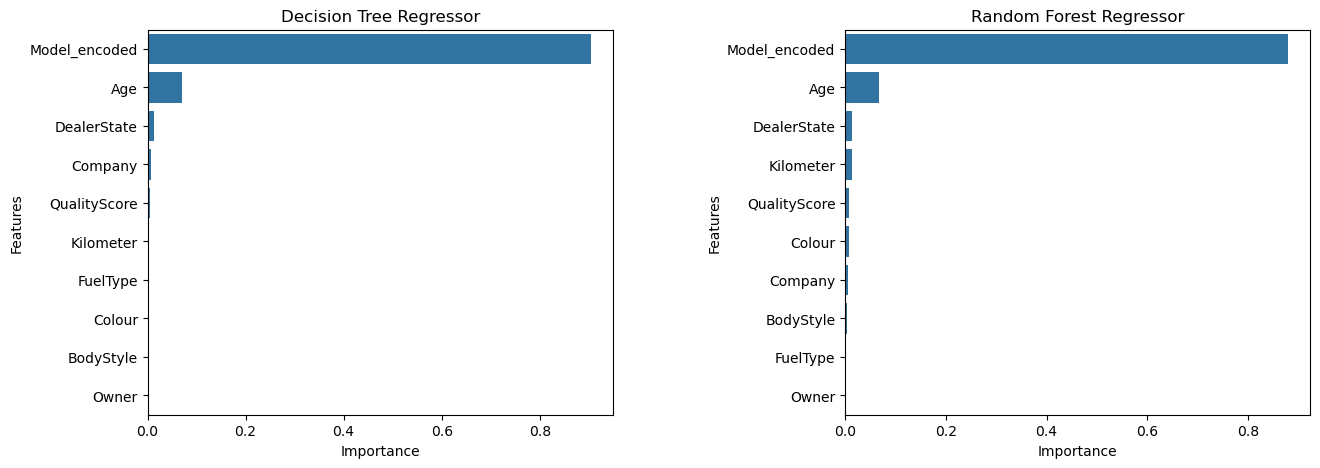

In [89]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)

#Decision Tree Regressor
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':dtr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[0]).set_title('Decision Tree Regressor')

#Random Forest Regressor
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':rfr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[1]).set_title('Random Forest Regressor')

In [90]:
#Saving The Model
import pickle
pickle.dump(rfr, open("build.pkl",'wb'))

In [91]:
X_train

,Company,FuelType,Colour,Kilometer,BodyStyle,Age,Owner,DealerState,QualityScore,Model_encoded
412,7,3,61,36823,0,9,0,0,7.6,1.023815e+06
880,7,3,61,22487,5,5,0,4,8.8,9.403750e+05
486,7,3,61,28215,1,7,0,0,8.1,6.753333e+05
836,17,3,61,50239,1,10,0,3,7.6,3.753000e+05
967,12,3,2,41294,1,5,0,9,8.3,6.459722e+05
...,...,...,...,...,...,...,...,...,...,...
118,5,1,27,122790,1,12,1,2,6.9,3.670000e+05
326,12,3,49,18794,1,4,0,0,8.2,4.866667e+05
1020,7,3,61,28264,5,4,0,5,8.7,1.023815e+06
541,7,3,49,36373,1,8,0,1,7.7,5.024800e+05


In [294]:
X_train['Kilometer'].sort_values()

1029      3850
308       3937
1013      5512
564       5759
996       5814
         ...  
180     110000
806     116688
144     116959
186     120000
118     122790
Name: Kilometer, Length: 713, dtype: int64

In [295]:
X_train['Age'].value_counts()

Age
7     121
8     119
9      88
6      69
10     64
11     61
4      50
5      45
12     28
13     21
3      19
14     14
15     11
16      3
Name: count, dtype: int64

In [296]:
X_train.columns

Index(['Company', 'FuelType', 'Colour', 'Kilometer', 'BodyStyle', 'Age',
       'Owner', 'DealerState', 'Warranty', 'QualityScore', 'Model_encoded'],
      dtype='object')

In [92]:
import pickle
label_encoders = pickle.load(open("label_encoders.pkl", 'rb'))
print(label_encoders.keys())

dict_keys([])
